In [1]:
# Librairies
import os
import sys
code_path = os.path.split(os.getcwd())[0]
sys.path.append(code_path)
import numpy as np
import networkx as nx
from scipy.sparse import load_npz
import seaborn as sns
import pandas as pd
from setting import *
from loader import *
from graphs import *
from utils import *
from plots_and_stats import *
from clustering import *
from XAI_method import *

/projects/GraphNEx/anaconda3/envs/GraphNEx/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [52]:
# Arguments
name = "syn_t_100"
data_type = "XAI"  # "data" or "XAI"
matrix_type = "variables" # "variables" or "samples"
method = 'pearson_correlation'
min_value = None
print(f"Adjacency matrix: {method} using {matrix_type} on {data_type}")
n_node = 300
t_inf = 0.2
t_sup = None

Adjacency matrix: pearson_correlation using variables on XAI


In [53]:
# Path
save_path = get_save_path(name, code_path)
data_path = get_data_path(name)

# Adjacency matrix

In [54]:
# Load sparse matrix
if data_type == "data":
    set_name = 'train'
    create_new_folder(os.path.join(save_path, "figures", set_name))
    if matrix_type == "variables":
        A = load_npz(os.path.join(save_path, 'graph', f'{method}_{min_value}_variables.npz'))
    elif matrix_type == "samples":
        A = load_npz(os.path.join(save_path, 'graph', f'{method}_{min_value}_samples.npz'))
elif data_type == "XAI":
    model_name = 'LR'
    exp = 1
    XAI_method = "Integrated_Gradients"
    set_name = 'train'
    save_path = os.path.join(save_path, model_name, f"exp_{exp}", XAI_method)
    create_new_folder(os.path.join(save_path, "figures", set_name))
    if matrix_type == "variables":
        A = load_npz(os.path.join(save_path, 'graph', f'{set_name}_{method}_{min_value}_variables.npz'))
    elif matrix_type == "samples":
        A = load_npz(os.path.join(save_path, 'graph', f'{set_name}_{method}_{min_value}_samples.npz'))
A = A.toarray()

In [55]:
Ar = A[:n_node, :][:, :n_node]

# Visualisation

In [56]:
if matrix_type == "variables":
    xlabel = "Variables"
    ylabel = "Variables"
    save_name = os.path.join(save_path, "figures", set_name, f"{method}_variables")
elif matrix_type == "samples":
    xlabel = "Samples"
    ylabel = "Samples"
    save_name = os.path.join(save_path, "figures", set_name, f"{method}_samples")

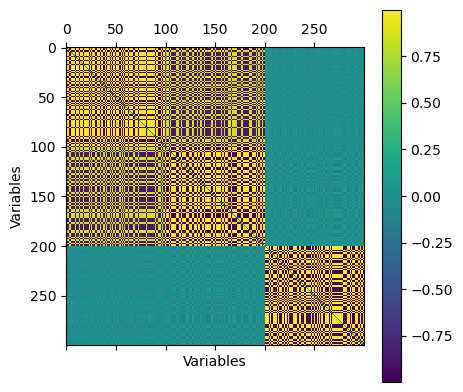

In [57]:
plot_matrix(Ar, xlabel, ylabel, save_name + "_adjacency_matrix")

We keep the weights higher than 0.2.


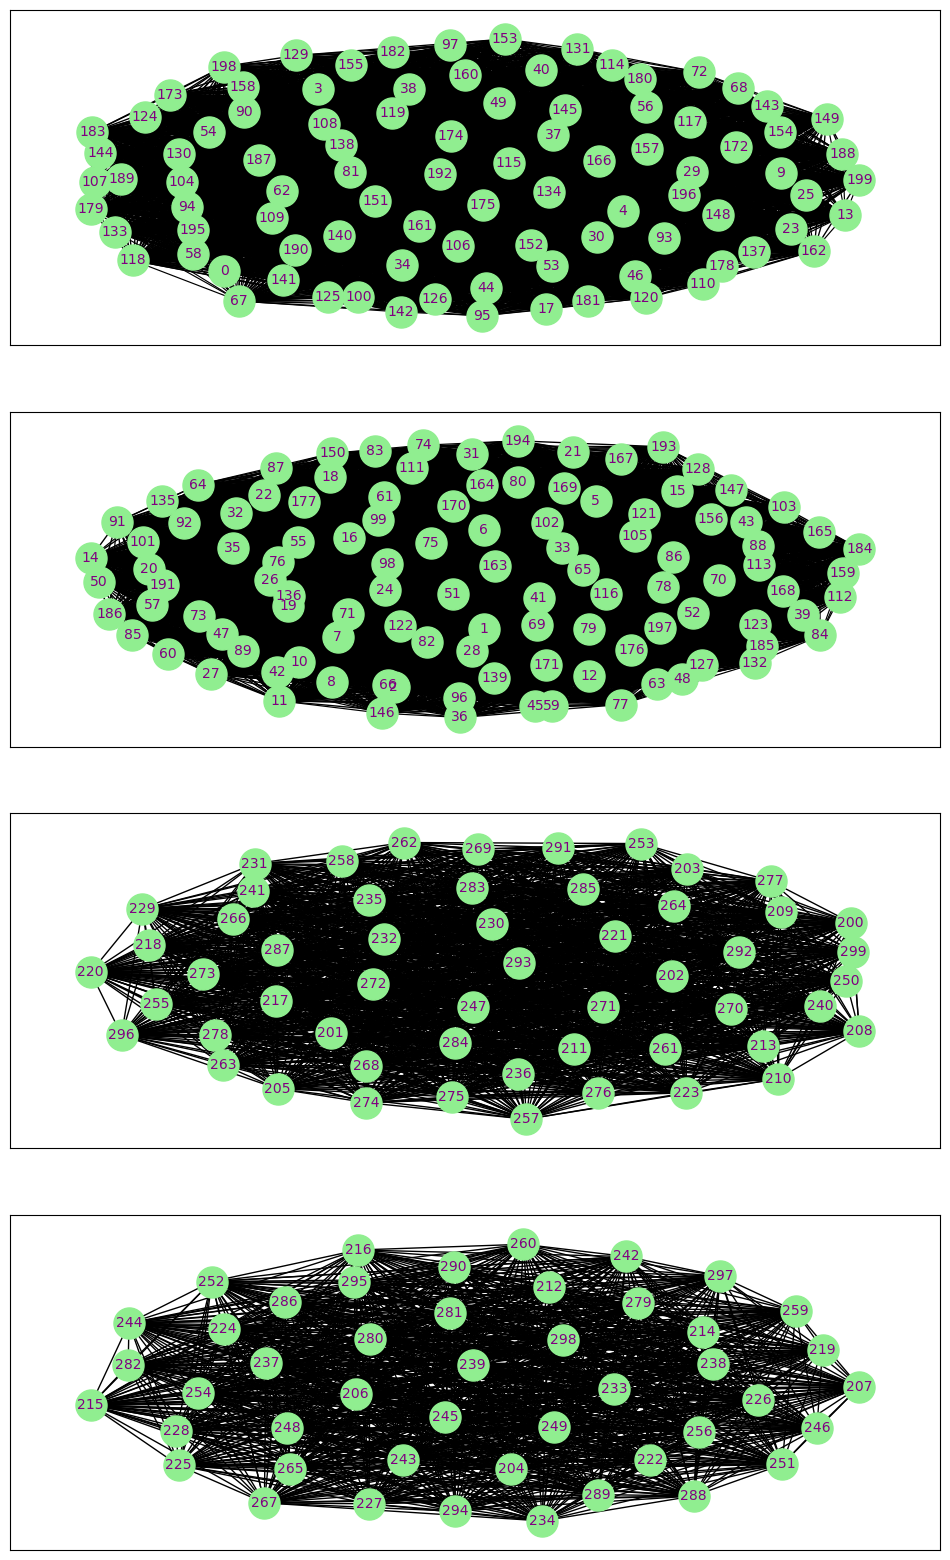

In [66]:
S = make_a_graph_sparse(Ar, t_inf=t_inf, t_sup=t_sup)

G = nx.Graph(S)

n_plot = nx.number_connected_components(G)
plt.figure(figsize=(12, 5 * n_plot))
for i, sub_G in enumerate(nx.connected_components(G)):
    sub_G = G.subgraph(sub_G)
    plt.subplot(n_plot, 1, i+1)
    labels = {}
    for item in list(sub_G.nodes):
        labels[item] = item
    pos = nx.spring_layout(sub_G, scale=1)
    nx.draw_networkx_nodes(sub_G, pos, node_size=500, node_color='lightgreen')
    widths = nx.get_edge_attributes(sub_G, 'weight')
    nx.draw_networkx_edges(sub_G, pos, edgelist=widths.keys(), width=np.array(list(widths.values())))
    nx.draw_networkx_labels(sub_G, pos, labels, font_size=10, font_color='purple')
if save_name:
    plt.savefig(save_name + "_graph", bbox_inches='tight', dpi=150)
plt.show()